In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation
from matplotlib.font_manager import FontProperties as FP
from matplotlib import colors as col

#Set ffmpeg location
plt.rcParams['animation.ffmpeg_path'] = './ffmpeg/bin/ffmpeg.exe'

#Set fig size
plt.rcParams['figure.figsize'] = (20,12)

#Set font
font = FP(fname="./Font/SimHei.ttf")

#Set style
plt.style.use('ggplot')

In [2]:
df = pd.read_excel("./Data/CPI Quatity Weight.xlsx")
df

,Type,2021,2016,Amount of change
0,Food,25.4,23.7,1.7
1,Clothing and Footwear,5.3,4.6,0.7
2,Shelter,24.2,22.7,1.5
3,Transportation and Communication,14.4,15.3,-0.9
4,Medical Care,4.8,4.3,0.5
5,Recreation & Education,12.9,14.7,-1.9
6,Other Goods & Services,13.0,14.7,-1.7


In [4]:
item = df["Type"]
item_value = df[2021]
item_value_old = df[2016]

C:\Users\Zacha\AppData\Local\Temp\ipykernel_7028\3060800158.py:10: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(
C:\Users\Zacha\AppData\Local\Temp\ipykernel_7028\3060800158.py:21: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(


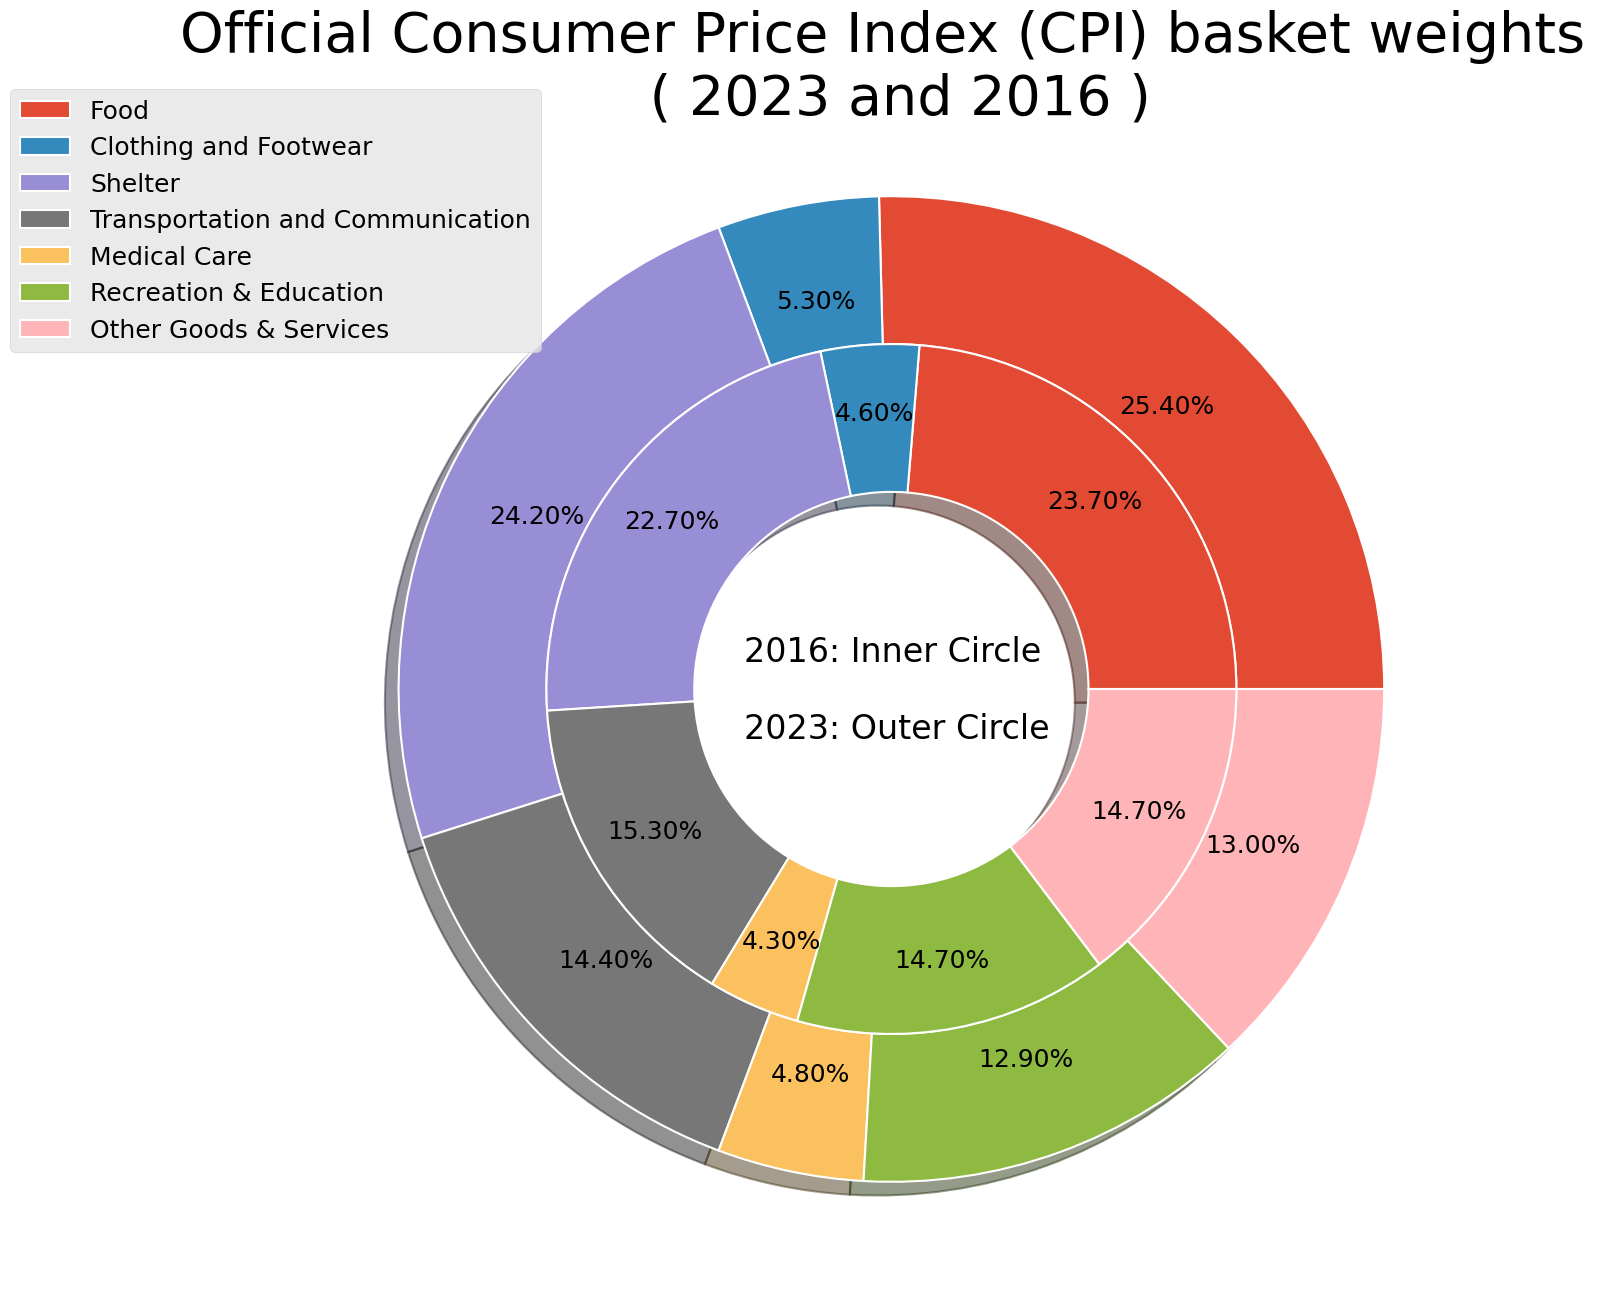

In [8]:
fig, ax = plt.subplots()
size = 0.3
fig.set_figwidth(30)
fig.set_figheight(16)

def animate(i):
    
    ax.clear()

    ax.pie(
        x=item_value.values[:i], 
        radius = 1,
        autopct='%.2f%%', 
        shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.6},
        startangle=0,
        textprops={'fontsize':18},
        wedgeprops=dict(width=size, edgecolor='w', linewidth=1.5),
        pctdistance= 0.8,
        )

    ax.pie(
        x=item_value_old.values[:i], 
        radius = 1-size,
        autopct='%.2f%%', 
        shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.6},
        startangle=0,
        textprops={'fontsize':18},
        wedgeprops=dict(width=size, edgecolor='w', linewidth=1.5),
        pctdistance= 0.8
        )

    ax.legend(loc='center', bbox_to_anchor=(0,0.88), labels= item.values[:i], fontsize = 18)
    ax.annotate('2016: Inner Circle \n\n2023: Outer Circle', xy=(-0.3,-0.1), fontsize = 24)
    ax.set_title('Official Consumer Price Index (CPI) basket weights \n ( 2023 and 2016 )', fontsize= 40, y=0.96)

ani = animation.FuncAnimation(
     fig, animate, frames=range(15), interval = 600, repeat= False)

ani.save('CPI_Basket_Weight.mp4') 

plt.show()